In [1]:
from segmentation.DDRNet_23_slim import *
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

ModuleNotFoundError: No module named 'torch'

In [2]:
img = cv2.imread("gray.png",flags=cv2.IMREAD_GRAYSCALE)

In [3]:
img = img / 255

In [4]:
img.shape

(1024, 2048)

In [5]:
temp = np.pad(img,((1,1),(1,1)),mode="constant")

In [6]:
temp.shape

(1026, 2050)

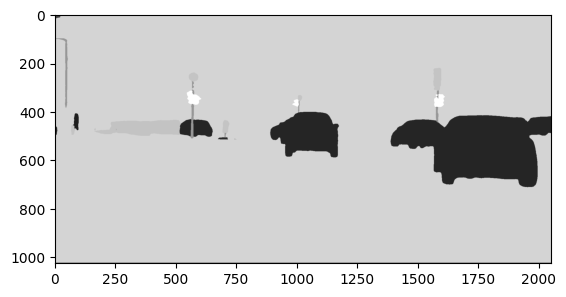

In [7]:
plt.imshow(temp,cmap='Greys_r')

In [8]:
temp.max()

0.8235294117647058

In [20]:
def probility_switch(v):
    x = np.random.random()
    return x<v

In [21]:
kernel = np.array([[0,1/8,0],[1/8,1/2,1/8],[0,1/8,0]]) 

In [22]:
filtered_image = cv2.filter2D(temp, -1, kernel)

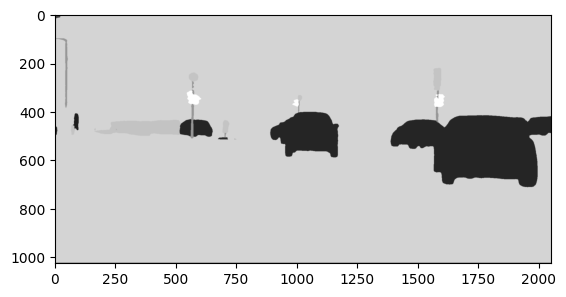

In [23]:
plt.imshow(filtered_image,cmap='Greys_r')

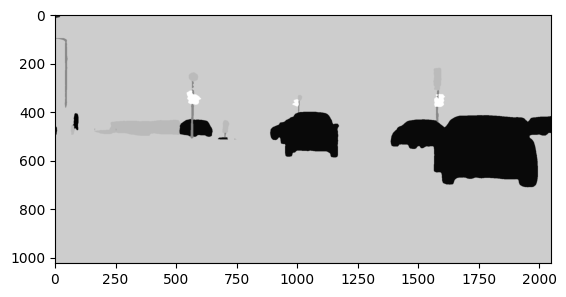

In [24]:
plt.imshow(filtered_image[1:-1,1:-1],cmap='Greys_r')

In [25]:
final_img = filtered_image[1:-1,1:-1]

In [26]:
final_img.shape

(1024, 2048)

In [27]:
is_on = np.zeros((1024,2048),dtype=bool)

In [28]:
for i,x in enumerate(final_img):
    for j,y in enumerate(x):
        tt = probility_switch(j)
        is_on[i,j] = tt

In [29]:
ff = is_on * final_img

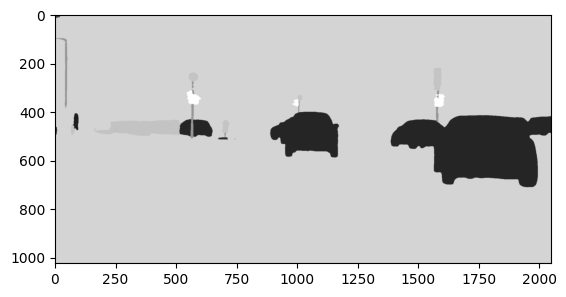

In [30]:
plt.imshow(ff*255,cmap='Greys_r')

In [34]:
ff = ff.astype(np.float32)
ff = abs(1-ff)

In [35]:
image_path = 'aachen_000003_000019_leftImg8bit.png'  # 替换为你的图像路径  
image = cv2.imread(image_path)
# 将图像转换为HSV色彩空间
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
# 提取V通道（表示亮度）并创建新的图像
brightness_channel = hsv_img[:, :, 2]
new_brightness_channel = brightness_channel *ff + 50# 这里加上了50作为示例，根据需求自定义数值
 
# 更新原始图像的亮度通道
hsv_img[:, :, 2] = new_brightness_channel
 
# 将图像从HSV色彩空间转换回BGR色彩空间
output_image = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)

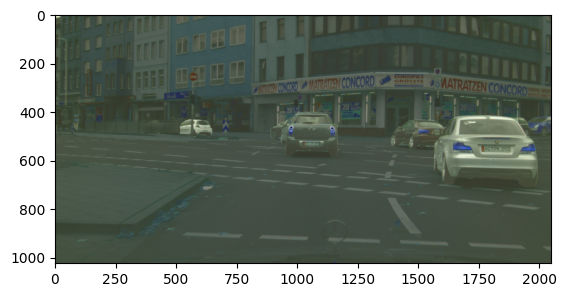

In [36]:
plt.imshow(output_image)